In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

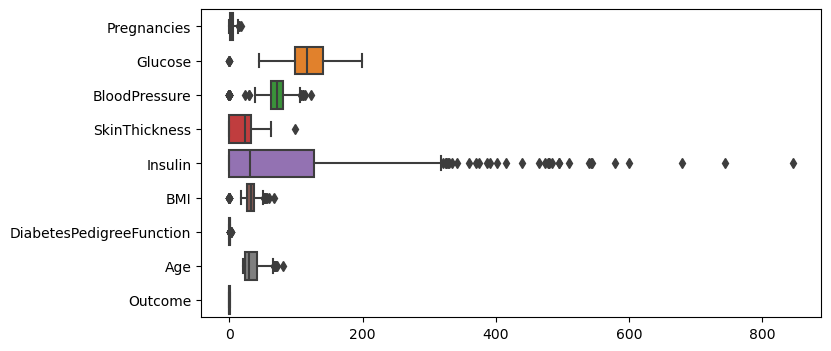

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.boxplot(data=df,orient='h')

<Axes: xlabel='Insulin'>

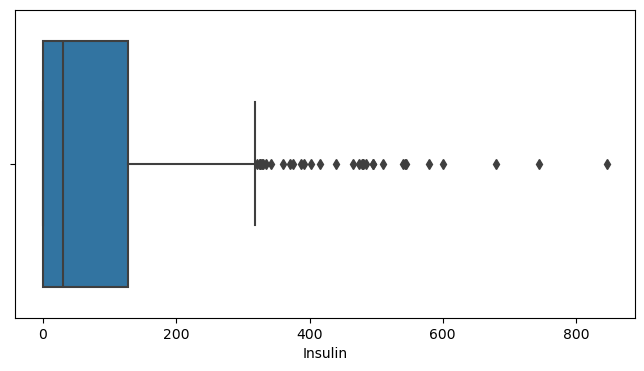

In [7]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x="Insulin",data=df,orient='h')

In [8]:
x = df.drop("Outcome",axis=1)
y=df["Outcome"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(768, 8)
(768, 1)


In [9]:
from sklearn.preprocessing import StandardScaler
#define min max scaler
scaler=StandardScaler()
scaled = scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state =40)
from sklearn.linear_model import LinearRegression

In [11]:
#import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
yp=logreg.predict(x_test)
y_train_p=logreg.predict(x_train)

In [12]:
logreg.score(x_train,y_train)

0.7785016286644951

# Peformance measures of classification

In [13]:
# import the metrics class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yp)
cnf_matrix

array([[86,  9],
       [27, 32]], dtype=int64)

In [14]:
# import the metrics class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_train,y_train_p)
cnf_matrix

array([[360,  45],
       [ 91, 118]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_p))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       405
           1       0.72      0.56      0.63       209

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,yp))
print("Precision:",metrics.precision_score(y_test,yp))
print("Recall:",metrics.recall_score(y_test,yp))

Accuracy: 0.7662337662337663
Precision: 0.7804878048780488
Recall: 0.5423728813559322


In [18]:
print("Accuracy:",metrics.accuracy_score(y_train,y_train_p))
print("Precision:",metrics.precision_score(y_train,y_train_p))
print("Recall:",metrics.recall_score(y_train,y_train_p))

Accuracy: 0.7785016286644951
Precision: 0.7239263803680982
Recall: 0.5645933014354066


In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid= {"C":[1,2,3,4,5,6,7,8,9,10], 
            "penalty":['l1',"l2"],
            "solver":['lbfgs','liblinear'],
            'max_iter':[10000,100000,1000000]} # parameters
grid_search = GridSearchCV(logreg,param_grid,scoring='precision',cv=5)# score
grid_search.fit(y_test,yp)

lr = grid_search.best_estimator_
grid_search.best_params_,grid_search.best_score_

({'C': 2, 'max_iter': 1000000, 'penalty': 'l1', 'solver': 'liblinear'},
 0.5487179487179488)

In [22]:
logreg=LogisticRegression(C= 1, max_iter= 1000000000, penalty='l1',solver= 'liblinear')
# fit the model with data
logreg.fit(x_train,y_train)
# prediction with test
y_pred=logreg.predict(x_test)
y_train_p=logreg.predict(x_train)

In [23]:
# import the metrix class
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yp)
cnf_matrix

array([[86,  9],
       [27, 32]], dtype=int64)

In [24]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [25]:
print(classification_report(y_train,y_train_p))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       405
           1       0.73      0.57      0.64       209

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614

